# 선형회귀 모델 (sklearn)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1. 데이터 불러오기

In [4]:
df.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,...,상권코드_1495,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,0,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177
1,1,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3026454.0,22.00,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257
2,2,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4033679.0,5.00,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362
3,3,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3262023.0,8.00,53.000000,2.379674e+08,2427.0,165.0,2.466393e+11,6054.0,2.107308
4,4,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3764785.0,14.48,82.273333,2.942853e+08,1104.0,593.0,3.766214e+11,104830.0,2.163080


In [5]:
# (row, column)

df.shape

(32912, 1508)

In [6]:
# column 확인

df.columns

Index(['Unnamed: 0', '기준_년_코드', '기준_분기_코드', '상권코드_0', '상권코드_1', '상권코드_2',
       '상권코드_3', '상권코드_4', '상권코드_5', '상권코드_6',
       ...
       '상권코드_1495', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률'],
      dtype='object', length=1508)

In [7]:
# 결측치 확인

n_of_nulls = df.isnull().sum().sum()
print("결측치 수 : ", n_of_nulls)

결측치 수 :  0


In [8]:
# 상권별로 구분

for i in range(1496):
    globals()['df_{}'.format(i)] = df[df['상권코드_'+str(i)] == 1]

In [ ]:
df_0.head()

- 성능확인을 위해 상권코드가 0인 상권 하나만으로 진행

## 2. 데이터 전처리
### (1) 데이터 정규화

In [10]:
# 사용할 column 추출

columns = ['총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률']

df_lm = df_0[columns]

In [11]:
df_lm.head()

,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
1474,308310.0,26.0,69.0,249322039.0,1800.0,73.0,4.046282e+09,842.0,2.000000
2949,336343.0,26.0,69.0,249322039.0,1800.0,73.0,5.560254e+09,842.0,5.583756
4424,457213.0,29.0,75.0,249484517.0,1800.0,73.0,6.001523e+09,842.0,0.913242
5917,409966.0,29.0,75.0,249484517.0,1806.0,73.0,3.751288e+09,609.0,1.382488
7410,416759.0,29.0,75.0,249484517.0,1806.0,73.0,3.329090e+09,609.0,4.651163


In [12]:
# min-max scaling 진행

df_lm_n = df_lm.copy()
for col in df_lm_n.columns:
    if col == '폐업률':
        pass
    else:
        df_lm_n[col] = minmax_scaling(df_lm[col], columns=[0])

In [13]:
# 결과 확인

df_lm_n.head()

,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
1474,0.621303,0.0,0.0,0.997718,0.267055,1.0,0.193064,0.919926,2.000000
2949,0.692598,0.0,0.0,0.997718,0.267055,1.0,0.600618,0.919926,5.583756
4424,1.000000,1.0,1.0,1.000000,0.267055,1.0,0.719405,0.919926,0.913242
5917,0.879839,1.0,1.0,1.000000,0.272903,1.0,0.113653,0.486034,1.382488
7410,0.897115,1.0,1.0,1.000000,0.272903,1.0,0.000000,0.486034,4.651163


## 3. Model_1 : 독립변수 전부 사용
### (1) 모델링

In [14]:
# 독립변수, 종속변수 설정

X = df_lm_n.drop('폐업률', axis = 1)
y = df_lm_n['폐업률']

In [15]:
# 학습 데이터, 검증 데이터 분할 (8:2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [16]:
# 모델 생성

Model_1 = LinearRegression()

In [17]:
# 모델 학습

Model_1 = Model_1.fit(X_train, y_train)

In [18]:
# 회귀 계수

Model_1.coef_

array([  0.90733233,  27.46358137, -31.71061987,   5.42455323,
         0.73496505,  10.18879384,  -4.66487076,   2.54973784])

In [19]:
# 회귀 절편

Model_1.intercept_

-10.385670864892797

### (2) 성능 확인

In [20]:
# 검증 데이터 예측

y_predict = Model_1.predict(X_test)

In [21]:
# 실제값 : 예측값 비교

y_compare = {'y_test' : y_test, 'y_predict' : y_predict}
pd.DataFrame(y_compare)

,y_test,y_predict
18299,4.102564,2.032825
1474,2.000000,7.420253
20985,3.703704,3.947820
10245,2.764977,-0.883457
27692,5.882353,4.132065


Text(0.5, 1.0, 'y_predict & y_test')

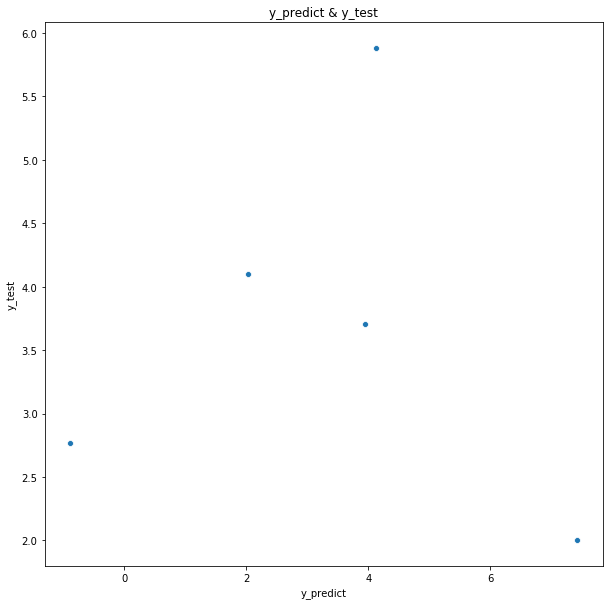

In [22]:
# 실제값 : 예측값 비교

plt.figure(figsize = (10,10))
sns.scatterplot(x = 'y_predict', y = 'y_test', data = y_compare)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.title('y_predict & y_test')

In [23]:
# 훈련 데이터 결정계수(R-Squared)

Model_1.score(X_train, y_train)

0.8319955464881073

In [24]:
# 검증 데이터 결정계수(R-Squared)

Model_1.score(X_test, y_test)

-4.7658633322523904

In [25]:
# 훈련 데이터 RMSE

y_pred = Model_1.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.5521493426741524

In [26]:
# 검증 데이터 RMSE

y_pred = Model_1.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

3.165347586107262

## 4. Model_2 : 다중공선성 제거 후 모델링
### (1) 다중공선성 확인

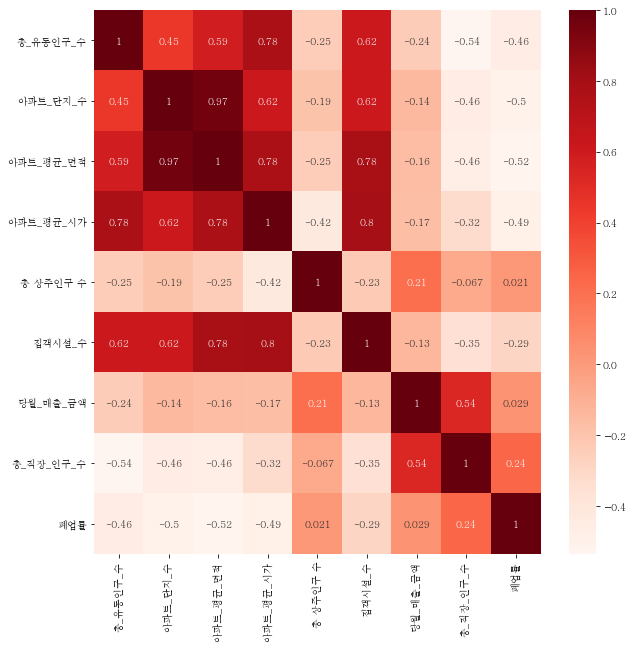

In [27]:
# 변수간 상관관계 히트맵

plt.rc('font', family='Batang')
plt.figure(figsize = (10,10))
sns.heatmap(df_lm_n.corr(), annot = True, cmap = 'Reds')

- 변수간 상관관계가 높은 경우 존재  
- 상관관계가 높은 변수들을 제거하여 모델의 성능을 높임

In [28]:
# VIF(분산 팽창 요인) 계산

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_lm_n.values, i) for i in range(df_lm_n.shape[1])]
vif["features"] = df_lm_n.columns
vif

- VIF Factor가 10 이상 >> 위험
- VIF Factor가 5 이상 >> 주의
- '아파트 평균 면적' column 제거 후 다시 계산

In [30]:
df_lm_2 = df_lm_n.drop('아파트_평균_면적', axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_lm_2.values, i) for i in range(df_lm_2.shape[1])]
vif["features"] = df_lm_2.columns
vif

In [32]:
df_lm_2 = df_lm_2.drop('당월_매출_금액', axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_lm_2.values, i) for i in range(df_lm_2.shape[1])]
vif["features"] = df_lm_2.columns
vif

In [34]:
df_lm_2 = df_lm_2.drop('아파트_평균_시가', axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_lm_2.values, i) for i in range(df_lm_2.shape[1])]
vif["features"] = df_lm_2.columns
vif

### (2) 모델링

In [36]:
# 데이터 분할

X = df_lm_2.drop('폐업률', axis = 1)
y = df_lm_2['폐업률']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2, random_state = 2)

# 모델 학습

Model_2 = LinearRegression()
Model_2 = Model_2.fit(X_train_2, y_train_2)

In [37]:
# 회귀 계수

Model_2.coef_

array([-1.51655493, -3.93890972, -1.6755058 ,  2.3185508 , -0.8998764 ])

In [38]:
# 회귀식 절편

Model_2.intercept_

5.8880876524162975

### (3) 성능 확인

In [39]:
# 검증 데이터 예측

y_predict = Model_2.predict(X_test_2)

# 실제값 : 예측값 비교

y_compare = {'y_test' : y_test_2, 'y_predict' : y_predict}
pd.DataFrame(y_compare)

,y_test,y_predict
18299,4.102564,2.858447
1474,2.000000,5.989128
20985,3.703704,3.752735
10245,2.764977,2.475668
27692,5.882353,3.780071


Text(0.5, 1.0, 'y_predict & y_test')

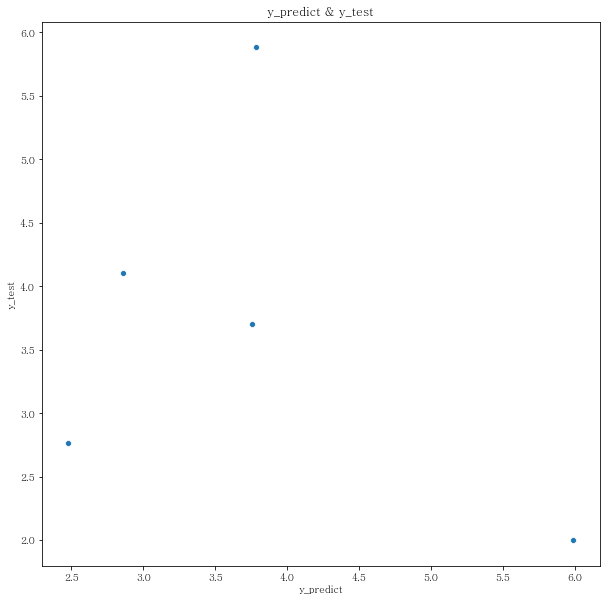

In [40]:
# 실제값 : 예측값 비교

plt.figure(figsize = (10,10))
sns.scatterplot(x = 'y_predict', y = 'y_test', data = y_compare)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.title('y_predict & y_test')

In [41]:
# 훈련 데이터 결정계수(R-Squared)

Model_2.score(X_train_2, y_train_2)

0.6254044703077346

In [42]:
# 검증 데이터 결정계수(R-Squared)

Model_2.score(X_test_2, y_test_2)

-1.5282237474794473

In [43]:
# 훈련 데이터 RMSE

y_pred = Model_2.predict(X_train_2)
np.sqrt(mean_squared_error(y_train_2, y_pred))

0.8244749357273012

In [44]:
# 검증 데이터 RMSE

y_pred = Model_2.predict(X_test_2)
np.sqrt(mean_squared_error(y_test_2, y_pred))

2.0960275556351835

- model1에 비해 성능이 개선됨

# 5. Model_3 : 변수선택 알고리즘 적용
### (1) 변수선택 알고리즘 정의

In [47]:
import time
import itertools 

def processSubset(X,y,feature_set):
    model = LinearRegression()
    regr = model.fit(X[list(feature_set)], y) 
    y_pred = regr.predict(X_test_3[list(feature_set)])
    rmse = math.sqrt(mean_squared_error(y_test_3, y_pred))
    return {"model" : regr, "rmse" : rmse, "features" : feature_set}

In [49]:
def getBest(X,y,k):
    results = []
    for combo in itertools.combinations(X.columns, k) :
        
        combo = (list(combo))  
        results.append(processSubset(X,y,feature_set = combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['rmse'].argmin()]
    toc = time.time()
    print("Processed", models.shape[0], "predictors")
    
    return best_model

- RMSE가 가장 낮은 모델 반환

### (2) 모델링

In [45]:
X = df_lm_n.drop('폐업률', axis = 1)
y = df_lm_n['폐업률']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [51]:
# 독립변수 개수에 따른 모델 성능

re_list = []
for k in range(1,9):
    re = getBest(X_train_3, y_train_3, k)
    re_list.append(re)
k = [i for i in range(1,9)]
model_df = pd.DataFrame(re_list, k)
model_df

Processed 8 predictors
Processed 28 predictors
Processed 56 predictors
Processed 70 predictors
Processed 56 predictors
Processed 28 predictors
Processed 8 predictors
Processed 1 predictors


,model,rmse,features
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.051952,[아파트_평균_시가]
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.027124,"[총_유동인구_수, 아파트_평균_시가]"
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.031313,"[총_유동인구_수, 아파트_평균_시가, 당월_매출_금액]"
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.073429,"[총_유동인구_수, 아파트_평균_시가, 집객시설_수, 당월_매출_금액]"
5,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.174115,"[총_유동인구_수, 아파트_평균_시가, 총 상주인구 수, 집객시설_수, 당월_매출_금액]"
6,"LinearRegression(copy_X=True, fit_intercept=Tr...",1.418366,"[총_유동인구_수, 아파트_평균_시가, 총 상주인구 수, 집객시설_수, 당월_매출_..."
7,"LinearRegression(copy_X=True, fit_intercept=Tr...",2.009890,"[총_유동인구_수, 아파트_단지_수, 아파트_평균_면적, 아파트_평균_시가, 총 상..."
8,"LinearRegression(copy_X=True, fit_intercept=Tr...",3.165348,"[총_유동인구_수, 아파트_단지_수, 아파트_평균_면적, 아파트_평균_시가, 총 상..."


- rmse가 가장 낮은 2번째 모델 선택

In [52]:
Model_3 = model_df.loc[2,'model']

In [53]:
# 회귀 계수

Model_3.coef_

array([-0.74588971, -0.83152059])

In [54]:
# 회귀식 절편

Model_3.intercept_

3.9040985049899692

### (3) 성능 확인

In [55]:
f = model_df.loc[2,'features']

In [56]:
# 훈련 데이터 결정계수(R-Squared)

Model_3.score(X_train_3[f], y_train_3)

0.15204778848304734

In [57]:
# 검증 데이터 결정계수(R-Squared)

Model_3.score(X_test_3[f], y_test_3)

0.3928903376458692

In [58]:
# 훈련 데이터 RMSE

y_pred = Model_3.predict(X_train_3[f])
np.sqrt(mean_squared_error(y_train_3, y_pred))

1.240457390525773

In [59]:
# 검증 데이터 RMSE

y_pred = Model_3.predict(X_test_3[f])
np.sqrt(mean_squared_error(y_test_3, y_pred))

1.0271238343650384

- 예측 성능은 좋지만 훈련데이터, 검증데이터에 대한 설명력은 떨어짐

## 6. Model_4 : 폐업률과의 상관관계 및 유의성 고려
### (1) 모델링

- 폐업률과 상관관계가 있고 유의미한 column만 선택 (EDA 참고)

In [60]:
# 폐업률과 상관관계가 있고 유의미한 column만 선택

df_lm_4 = df_lm_n[['총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가', '폐업률']]

In [61]:
X = df_lm_4.drop('폐업률', axis = 1)
y = df_lm_4['폐업률']
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [62]:
Model_4 = LinearRegression().fit(X = X_train_4, y = y_train_4)

In [63]:
# 회귀 계수

Model_4.coef_

array([ -1.04325206, -11.98025568,   8.57326645,  -1.89202935])

In [64]:
# 회귀식 절편

Model_4.intercept_

8.194022829566741

### (2) 성능 확인

In [65]:
# 훈련 데이터 결정계수(R-Squared)

Model_4.score(X_train_4, y_train_4)

0.49510105616519784

In [66]:
# 검증 데이터 결정계수(R-Squared)

Model_4.score(X_test_4, y_test_4)

-1.0912380348232205

In [67]:
# 훈련 데이터 RMSE

y_pred = Model_4.predict(X_train_4)
np.sqrt(mean_squared_error(y_train_4, y_pred))

0.9571905304332607

In [68]:
# 검증 데이터 RMSE

y_pred = Model_4.predict(X_test_4)
np.sqrt(mean_squared_error(y_test_4, y_pred))

1.9062987770138324

## 7. Model_5 : 상관관계 및 유의성 & 다중공선성 고려
### (1) 모델링

In [79]:
# VIF 계산

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_lm_4.values, i) for i in range(df_lm_4.shape[1])]
vif["features"] = df_lm_4.columns
vif

In [69]:
# 다중공선성이 발생하지 않도록 변수 선택

df_lm_5 = df_lm_n[['총_유동인구_수', '아파트_평균_시가', '폐업률']]

In [70]:
X = df_lm_5.drop('폐업률', axis = 1)
y = df_lm_5['폐업률']
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [71]:
model5 = LinearRegression().fit(X = X_train_5, y = y_train_5)

In [72]:
# 회귀 계수

model5.coef_

array([-0.74588971, -0.83152059])

In [73]:
# 회귀식 절편

model5.intercept_

3.9040985049899692

### (2) 성능 확인

In [74]:
# 훈련 데이터 결정계수(R-Squared)

model5.score(X_train_5, y_train_5)

0.15204778848304734

In [75]:
# 검증 데이터 결정계수(R-Squared)

model5.score(X_test_5, y_test_5)

0.3928903376458692

In [76]:
# 훈련 데이터 RMSE

y_pred = model5.predict(X_train_5)
math.sqrt(mean_squared_error(y_train_5, y_pred))

1.240457390525773

In [77]:
# 검증 데이터 RMSE

y_pred = model5.predict(X_test_5)
math.sqrt(mean_squared_error(y_test_5, y_pred))

1.0271238343650384

In [78]:
# 검증 데이터 예측

y_predict = model5.predict(X_test_5)

# 실제값 : 예측값 비교

y_compare = {'y_test' : y_test_5, 'y_predict' : y_predict}
pd.DataFrame(y_compare)

,y_test,y_predict
18299,4.102564,3.323030
1474,2.000000,2.611052
20985,3.703704,3.625274
10245,2.764977,2.812509
27692,5.882353,3.812220


## 8. 결론

### (1) Model_5를 최종 모델로 선택
- 기존의 모델보다 향상된 정확도를 보여줌
- 다중 공선성도 발생하지 않음
- 기존의 모델보다 훈련 데이터에 대한 RMSE가 증가했으나 훈련 데이터와 검증 데이터 모두에서 비슷한 수준의 RMSE를 보여줌
- 과적합을 문제가 발생하지 않음

### (2) 모델의 한계
- 위 과정은 1개의 상권에 대한 모델만을 우선적으로 개발한 것임. 총 1496개의 상권에 대한 모델 개발에는 상당한 시간과 노력이 필요할 수 있음
- 선형회귀 모형은 시간 개념을 포함시키지 못함. 연도별, 분기별 변화에 따른 값의 변동을 설명하지 못함
- 자기회귀 모형 등 시계열 회귀 모델에 대한 추가 조사가 필요
